CH 03-1 K-최근접 이웃 회귀

In [1]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

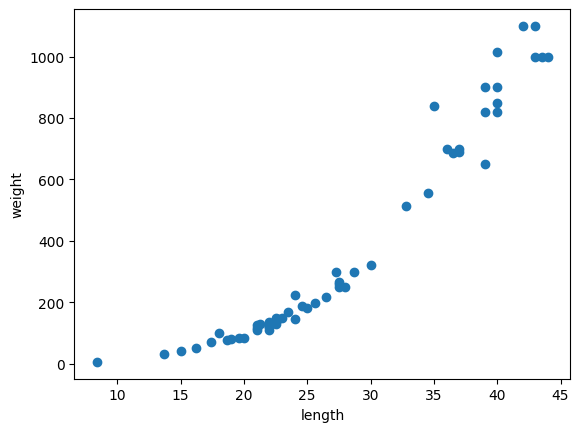

In [2]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [4]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [5]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [6]:
# 회귀의 경우 '결정계수'로 구한 점수를 출력한다.
knr.score(test_input, test_target)

0.992809406101064

In [8]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [9]:
knr.score(train_input, train_target)
# train의 스코어가 test보다 낮은 과소적합 발생

0.9698823289099254

In [10]:
# 과소적합을 해결하기 위해 모델을 더 복잡하게 만든다.
# k의 개수를 줄이면 모델이 복잡해진다.
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


neighbors is : 1
test score :  0.991309195814175
train score :  0.9852830341215901
mae :  22.685714285714287


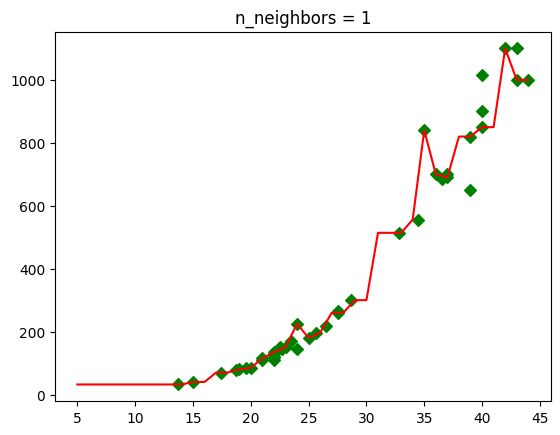

neighbors is : 5
test score :  0.992809406101064
train score :  0.9698823289099254
mae :  19.157142857142862


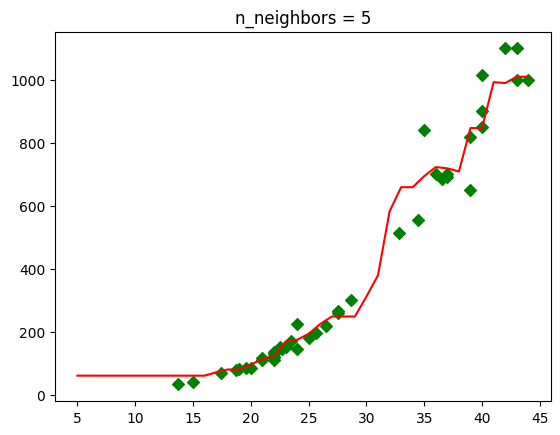

neighbors is : 10
test score :  0.9737908255822255
train score :  0.96164569026043
mae :  39.24285714285714


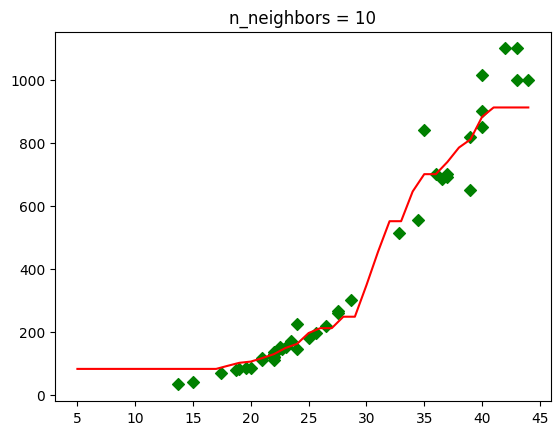

In [16]:
knr = KNeighborsRegressor()
x = np.arange(5, 45).reshape(-1, 1)

for n in [1, 5, 10]:
    print('neighbors is :', n)
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    print('test score : ', knr.score(test_input, test_target))
    print('train score : ', knr.score(train_input, train_target))
    test_prediction = knr.predict(test_input)
    print('mae : ', mean_absolute_error(test_target, test_prediction))
    prediction = knr.predict(x)
    plt.scatter(train_input, train_target, marker='D', color='green')
    plt.plot(x, prediction, color='red')
    plt.title('n_neighbors = {}'.format(n))
    plt.show()